<a href="https://colab.research.google.com/github/victoraccete/LED_tasks/blob/main/Desafio_LED_Parte_2_item_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 2

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Devido ao tamanho do dataset e limitações de hardware, optei por usar o Colab em conjunto com uma montagem do Drive, onde subi o dataset. Optei por usar o Colab mesmo para ter acesso a mais recursos computacionais. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
file_path = '/content/drive/MyDrive/Dataset LED task/part-00000-c04f74bd-6d4f-4253-bfd8-2a679a5b3831.c000.csv'
al_vaccination = pd.read_csv(file_path, sep=';')
al_vaccination['paciente_datanascimento'] = pd.to_datetime(al_vaccination['paciente_datanascimento'])
al_vaccination.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,05a98e21-3dcf-459e-b554-bb4eae76db46-i0b0,13d1a666d8b3a07409dc6e8cf29cdfdae134438a05fd1c...,63,1958-04-02,M,99,SEM INFORMACAO,270430.0,10.0,MACEIO,BRASIL,AL,57045.0,B,2009765,PREFEITURA MUNICIPAL DE MACEIO,DISTRITO SANITARIO,270430,MACEIO,AL,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,210090,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-03,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-03T20:03:31.000Z,NaN
1,d6e742c9-306c-4e23-a10d-240c3fe5329e-i0b0,a36ecae47d801e92e1dcbc2dcf6c432e3c8703ab2fa78e...,63,1958-02-04,M,99,SEM INFORMACAO,270430.0,10.0,MACEIO,BRASIL,AL,57030.0,B,2009722,SECRETARIA MUNICIPAL DE SAUDE,CENTRO DE SAUDE OSWALDO B VILELA 1 DS,270430,MACEIO,AL,926,Outros,9.0,Trabalhadores de Saúde,202009013,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-23,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-23T12:13:33.000Z,NaN
2,05b7a5c4-ec74-4569-ace4-6579b0b894c1-i0b0,687f5bd3102986936aabe86852c73ddfd0c42bc9f4573c...,66,1954-08-15,F,3,PARDA,270460.0,10.0,MARAVILHA,BRASIL,AL,57520.0,B,2719509,PREFEITURA MUNICIPAL DE MARAVILHA,CENTRO DE SAUDE DE MARAVILHA,270460,MARAVILHA,AL,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210110,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-08,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-08T22:13:11.000Z,NaN
3,eacebb25-26dc-4cff-a69d-0b7eee121d81-i0b0,ccbc64c15d390aa728be5720dd2d5dd351cc73023f8429...,74,1946-12-13,F,99,SEM INFORMACAO,270430.0,10.0,MACEIO,BRASIL,AL,57015.0,B,2009765,PREFEITURA MUNICIPAL DE MACEIO,DISTRITO SANITARIO,270430,MACEIO,AL,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210040,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-19,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-19T12:24:57.000Z,NaN
4,76bcded1-69ed-4ce3-a05f-dfc3e849313c-i0b0,9ecbddf5267f314268253d938a5599e99ad65a3d9925ca...,67,1953-05-17,F,3,PARDA,270450.0,10.0,MARAGOGI,BRASIL,AL,57955.0,B,2722380,PREFEITURA MUNICIPAL DE MARAGOGI,UNIDADE MISTA MARIA VICENCIA LIMA DE LIRA,270450,MARAGOGI,AL,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210080,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-05,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-05T19:21:28.000Z,NaN


## Item B
### Checando dados faltantes.

In [7]:
%%capture
!pip install missingno

In [8]:
import missingno as msno

Com o código abaixo, podemos ver a quantidade de observações não nulas de cada coluna e comparar com o número total de observações (1186877).

In [18]:
al_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186877 entries, 0 to 1186876
Data columns (total 34 columns):
 #   Column                                    Non-Null Count    Dtype         
---  ------                                    --------------    -----         
 0   document_id                               1186877 non-null  object        
 1   paciente_id                               1186877 non-null  object        
 2   paciente_idade                            1186877 non-null  int64         
 3   paciente_datanascimento                   1186877 non-null  datetime64[ns]
 4   paciente_enumsexobiologico                1186877 non-null  object        
 5   paciente_racacor_codigo                   1186877 non-null  int64         
 6   paciente_racacor_valor                    1186877 non-null  object        
 7   paciente_endereco_coibgemunicipio         1182032 non-null  float64       
 8   paciente_endereco_copais                  1182086 non-null  float64       
 9   pa

A informação mais interessante que obtemos a partir dos resultados acima é que a coluna 33, id_sistema_origem, é completamente nula. 

No entanto, podemos fazer melhor e podemos visualizar de maneira mais simples a quantidade de dados faltantes, e não a quantidade de dados não faltantes. Para isso, fazemos:

In [9]:
al_vaccination.isna().sum()

document_id                                       0
paciente_id                                       0
paciente_idade                                    0
paciente_datanascimento                           0
paciente_enumsexobiologico                        0
paciente_racacor_codigo                           0
paciente_racacor_valor                            0
paciente_endereco_coibgemunicipio              4845
paciente_endereco_copais                       4791
paciente_endereco_nmmunicipio                  4839
paciente_endereco_nmpais                       4791
paciente_endereco_uf                           4845
paciente_endereco_cep                        101117
paciente_nacionalidade_enumnacionalidade       4426
estabelecimento_valor                             0
estabelecimento_razaosocial                       0
estalecimento_nofantasia                          0
estabelecimento_municipio_codigo                  0
estabelecimento_municipio_nome                    0
estabelecime

Podemos usar a biblioteca missingno para **visualizar** os dados faltantes.  

Na visualização em forma de matriz abaixo, podemos visualizar a densidade dos dados faltantes no dataframe. Isso pode nos fornecer informações importantes, ao identificar padrões, se os dados são MAR (missing at random) ou MNAR (missing not at random).  

Por exemplo, na visualização abaixo podemos ver que algumas observações apresentam dados faltantes ao longo de múltiplas colunas, o que nos faz pensar que os dados não são MAR no que diz respeito a endereço.  

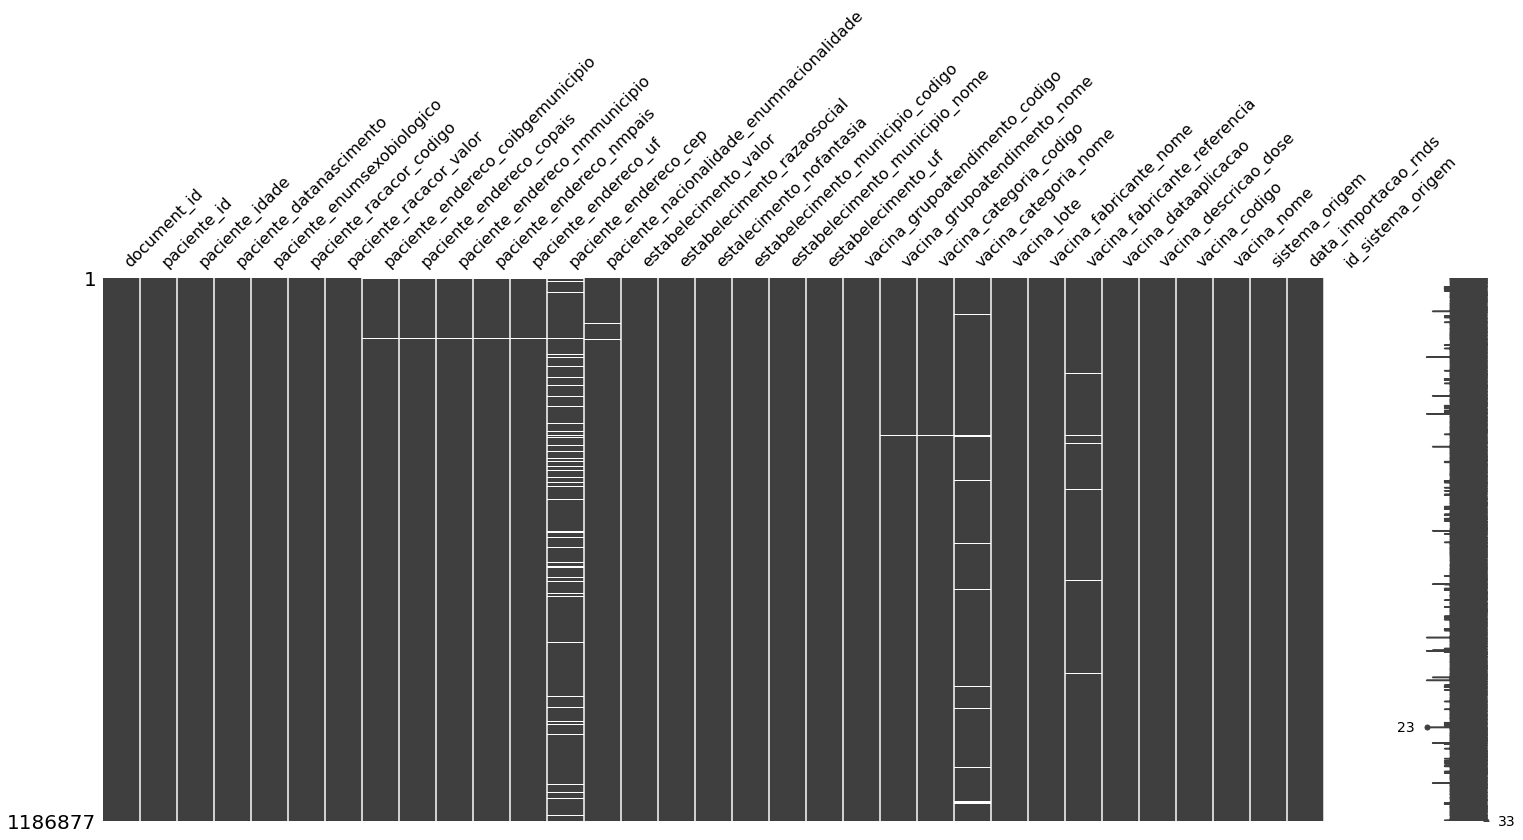

In [12]:
msno.matrix(al_vaccination)
plt.show()

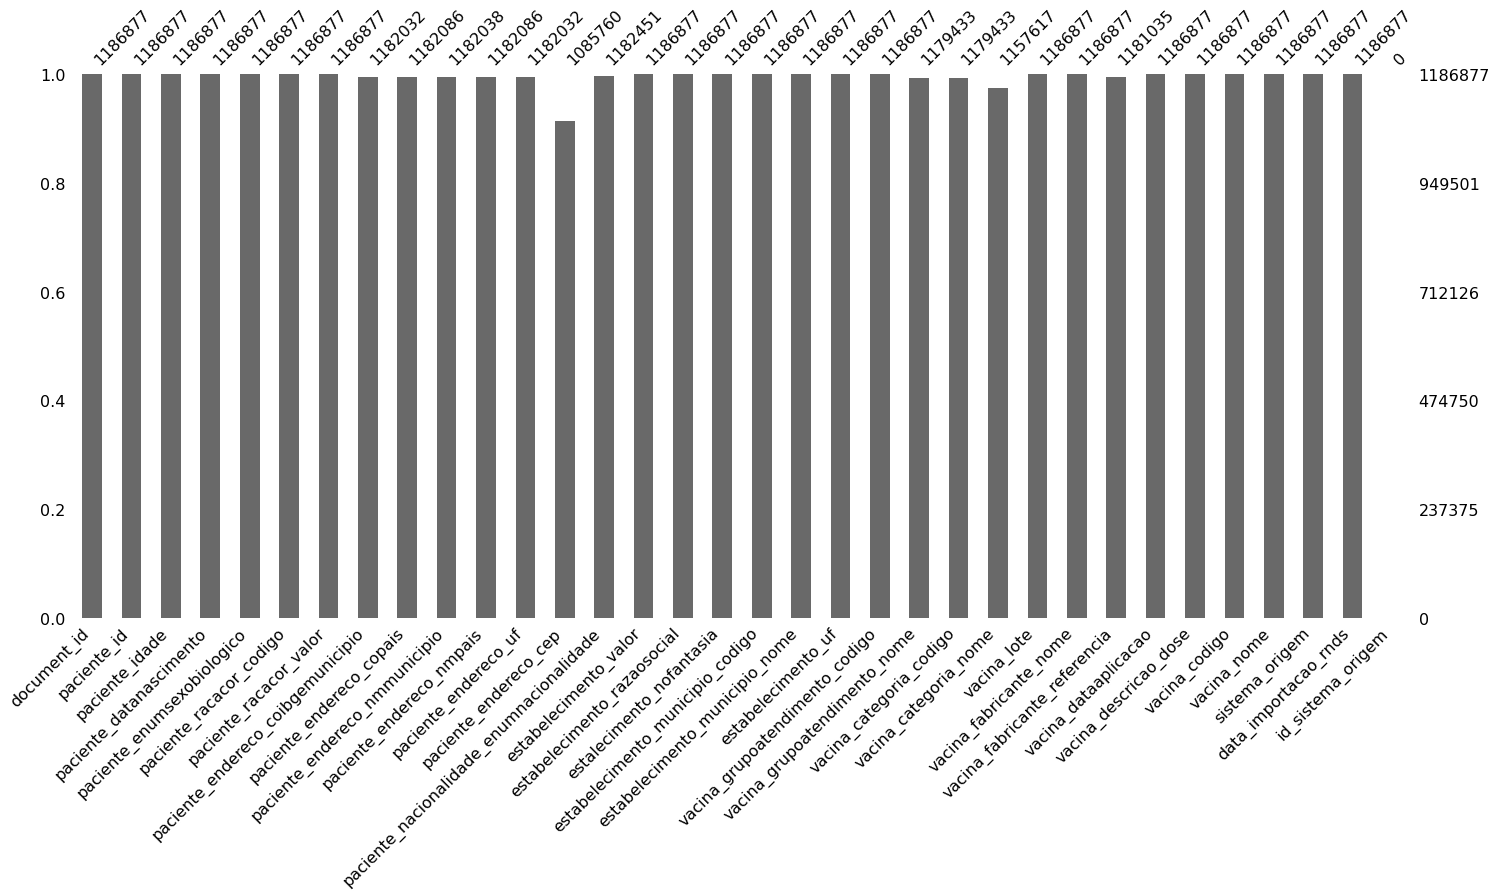

In [13]:
msno.bar(al_vaccination)
plt.show()

Vamos deletar a coluna id_sistema_origem, por ora, já que ela não nos acrescenta nada agora.  

In [44]:
try:
    al_vaccination = al_vaccination.drop(columns='id_sistema_origem')
except Exception as e:
    print(f"Possivelmente essa coluna já foi removida. {e}")

Possivelmente essa coluna já foi removida. "['id_sistema_origem'] not found in axis"


A análise de dados faltantes dessa forma pode ser útil para identificar padrões, no entanto, ela falha em reconhecer dados faltantes que não estão como nulos no conjunto de dados. Observe os dados a coluna de raça e cor, por exemplo:

In [45]:
al_vaccination['paciente_racacor_codigo'].unique()

array([99,  3,  4,  1,  5,  2])

Vemos que vai de 1 a 5, mas também tem o 99. O que seria esse 99? Vamos investigar:

In [46]:
al_vaccination['paciente_racacor_valor'].unique()

array(['SEM INFORMACAO', 'PARDA', 'AMARELA', 'BRANCA', 'INDIGENA',
       'PRETA'], dtype=object)

O 99 representa "Sem informação", isto é, quando não há dados sobre a raça/cor do paciente. Portanto, o valor 99 não pode ser considerado uma anomalia, e sim um dado faltante. No entanto, esse dado faltante pode acontecer ou por erro na construção da base ou mesmo porque o "Sem informação" são pessoas que escolheram não se identificar. 

Vamos voltar para as informações sobre cada coluna.

In [50]:
al_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186877 entries, 0 to 1186876
Data columns (total 33 columns):
 #   Column                                    Non-Null Count    Dtype         
---  ------                                    --------------    -----         
 0   document_id                               1186877 non-null  object        
 1   paciente_id                               1186877 non-null  object        
 2   paciente_idade                            1186877 non-null  int64         
 3   paciente_datanascimento                   1186877 non-null  datetime64[ns]
 4   paciente_enumsexobiologico                1186877 non-null  object        
 5   paciente_racacor_codigo                   1186877 non-null  int64         
 6   paciente_racacor_valor                    1186877 non-null  object        
 7   paciente_endereco_coibgemunicipio         1182032 non-null  float64       
 8   paciente_endereco_copais                  1182086 non-null  float64       
 9   pa

Ao procurar colunas que deveriam ser numéricas (int64 ou float64), mas não são, a princípio uma chama atenção.  
"vacina_lote", pois assumi que o lote é um valor numérico. Iremos investigar.

In [53]:
al_vaccination['vacina_lote'].unique()

array(['210090', '202009013', '210110', '210040', '210080', '4120Z001',
       '210050', '212VCD001ZVA', '210075', '210013', 'CTMAV505',
       '213VCD027Z', '213VCD004W', '210016', '213VCD007ZVA',
       '\xa04120Z005', '213VCD001W', '210041', '200280', '4120Z005',
       '213VCD009VA', '212VCD002ZVA', '210136', '210045', '210147',
       '202010033', '4120z005', 'EX2405', '210141', '210150', '210149',
       '210010', '214VCD052W', 'ABW4735', '210210', 'EW0199',
       '214VCD081Z', '210216', 'FA7478', '214VCD093Z', '210220', 'FC2495',
       '213VCD007VA', 'L231VCD001W', '214VCDO93Z', '214VCD106W',
       '41202001', '214VCD093W', '40202001', '15081923', '213VCD004ZVA',
       'l212vcd001zva', 'CTMAV501', '210011', '214VCD81Z', '4120Z025',
       '213VCD007W', '213VCD006ZVA', '213VCD018Z', '213VCD003W',
       '4120Z004', '210140', '214VCD048Z', '214VCD098Z', '213VCD0072VA',
       '004120Z005', '213VCD009AV', '41202005', '212CVD001ZVA',
       '214VC052W', 'L213VCD001W', '213VCD009

Aparentemente, o lote realmente não é numérico. 

### Procurando dados discrepantes
Vamos usar um boxplot e imprimir os máximos e os mínimos de todas as colunas numéricas. 

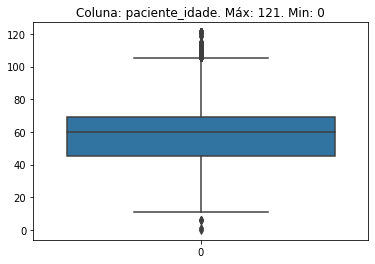

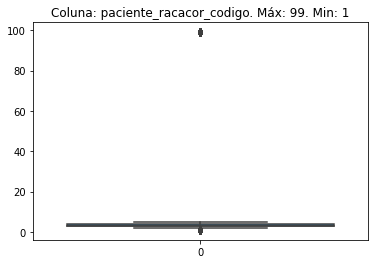

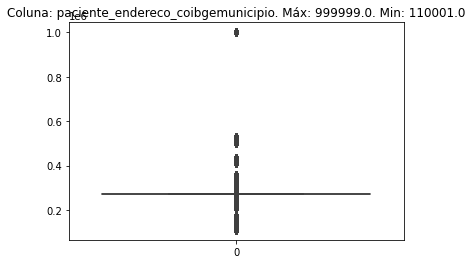

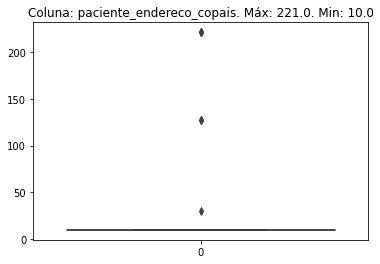

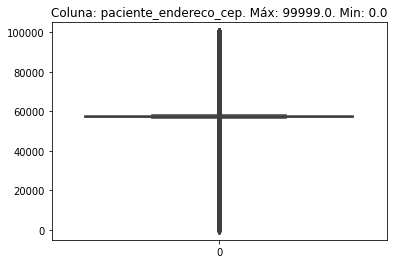

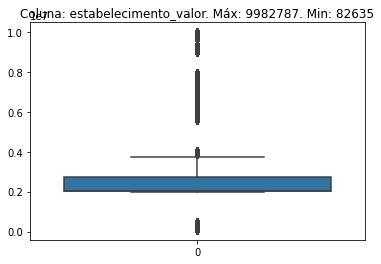

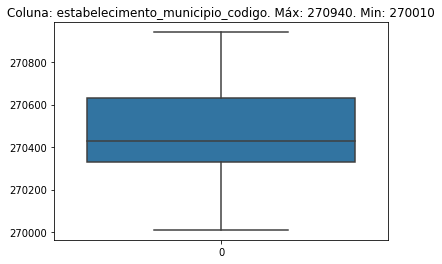

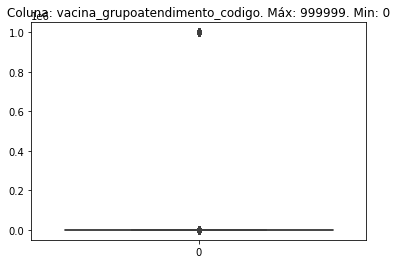

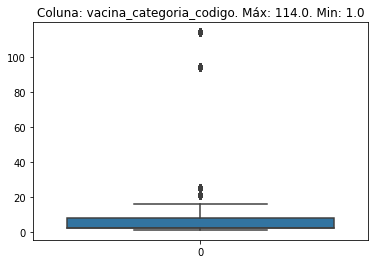

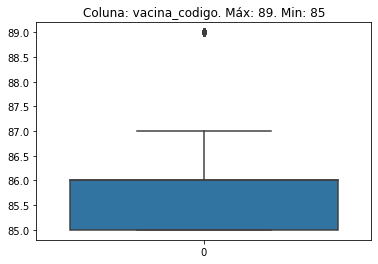

In [48]:
def get_info_numeric_cols(df: pd.DataFrame) -> None:
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            sns.boxplot(data=df[col])
            plt.title(f"Coluna: {col}. Máx: {df[col].max()}. Min: {df[col].min()}")
            plt.show()

get_info_numeric_cols(al_vaccination)

Alguns dados são claramente dados irregulares, como por exemplo a idade mínima como 0. Certamente é um dado inválido. No entanto, alguns dados possuem valores "absurdos", ou fora da faixa de normalidade, como um mecanismo para esconder dados inválidos, como foi o caso da raça "99", que representava uma entrada "Sem informação". 

Tomando um exemplo:

In [59]:
al_vaccination[al_vaccination['paciente_endereco_coibgemunicipio'] >= 999999]\
                .loc[:, ['paciente_endereco_coibgemunicipio', 'paciente_endereco_nmmunicipio']]

,paciente_endereco_coibgemunicipio,paciente_endereco_nmmunicipio
614,999999.0,INVALIDO
3878,999999.0,INVALIDO
7848,999999.0,INVALIDO
11316,999999.0,INVALIDO
17883,999999.0,INVALIDO
...,...,...
1145698,999999.0,INVALIDO
1148386,999999.0,INVALIDO
1177933,999999.0,INVALIDO
1178224,999999.0,INVALIDO


O mesmo acontece em outras colunas, como por exemplo o grupo de atendimento. 

In [58]:
al_vaccination[al_vaccination['vacina_grupoatendimento_codigo'] >= 999999]\
                .loc[:, ['vacina_grupoatendimento_codigo', 'vacina_grupoatendimento_nome']]

,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome
19874,999999,Outros Grupos
19878,999999,Outros Grupos
19888,999999,Outros Grupos
19908,999999,Outros Grupos
19926,999999,Outros Grupos
...,...,...
1184004,999999,Outros Grupos
1184721,999999,Outros Grupos
1184901,999999,Outros Grupos
1185608,999999,Outros Grupos


Entre outros...

Caso a intenção seja tornar esses dados inválidos como nulos, poderíamos fazer o seguinte:

In [63]:
al_vaccination['paciente_endereco_coibgemunicipio'] = al_vaccination['paciente_endereco_coibgemunicipio'].map({999999: np.nan})
al_vaccination['paciente_endereco_nmmunicipio'] = al_vaccination['paciente_endereco_nmmunicipio'].map({"INVÁLIDO": ""})
al_vaccination.loc[:, ['paciente_endereco_coibgemunicipio', 'paciente_endereco_nmmunicipio']]

,paciente_endereco_coibgemunicipio,paciente_endereco_nmmunicipio
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1186872,NaN,NaN
1186873,NaN,NaN
1186874,NaN,NaN
1186875,NaN,NaN


No entanto, nem sempre é o ideal fazer isso, pois se os dados faltantes forem removidos, isso pode gerar um viés nos dados, caso os dados sejam MNAR (Missing not at random). 